# Introduction to Time series

A **time series** is a sequence of data points recorded or measured at successive points in time, usually at uniform intervals. Time series analysis involves methods for analyzing these data points to extract meaningful statistics and identify characteristics of the data.

**Components of Time Series**
1. **Trend Component (T)**: Represents the general direction or pattern of the data over a long period.
2. **Seasonal Component (S)**: Captures the periodic fluctuations within a specific period (e.g., quarterly sales).
3. **Cyclic Component (C)**: Refers to long-term oscillations that are not necessarily periodic.
4. **Irregular Component (I)**: Random or residual variations after accounting for trend, seasonality, and cyclic components.

**Decomposition of Time Series**  
Time series can be decomposed into its components using either additive or multiplicative models:

* **Additive Model:**
Y(t)=T(t)+S(t)+C(t)+I(t)

 Data has same width and height of the seasonal patterns or peaks. Trend of the data is linear.

* **Multiplicative Model:**
Y(t)=T(t)×S(t)×C(t)×I(t)

 Data has increasing / decreasing width and height of the seasonal patterns or peaks. Trend of the data is non-linear.

# Information about dataset

We are using the data of transactions done using UPI, released by RBI.
[Link to dataset](https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49901#)

This dataset contain 3 columns :


1.   Date of transaction
2.   Volumne in lakhs
3.   Value in INR Crores



# Exploratory Data Analysis

In [ ]:
pip install statsmodels

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [ ]:
# Loading dataset
df = pd.read_csv("/content/UPI transaction data.csv")

In [ ]:
# Let's see first 5 rows
df.head(5)

,Date,Vol,Val
0,"June 1, 2020",476.97,10413.11
1,"June 2, 2020",476.78,9951.30
2,"June 3, 2020",456.26,9622.38
3,"June 4, 2020",463.05,9639.50
4,"June 5, 2020",464.79,9539.52


In [ ]:
# Let's see last 5 rows
df.tail(5)

,Date,Vol,Val
1486,"June 26, 2024",4481.40,62349.06
1487,"June 27, 2024",4504.87,62009.24
1488,"June 28, 2024",4527.52,66808.91
1489,"June 29, 2024",4755.43,70499.43
1490,"June 30, 2024",4619.75,59293.86


In [ ]:
# Converting date to pandas datetime
df['Date'] = pd.to_datetime(df['Date'])
# Now index will be Date
df.set_index('Date', inplace=True)

In [ ]:
# Checking shape of dataset
df.shape

(1491, 2)

In [ ]:
# Checking null values
df.isnull().sum()

,0
Vol,0
Val,0


In [ ]:
# various statistical measures
df.describe()

,Vol,Val
count,1491.000000,1491.000000
mean,2160.439611,34927.247458
std,1266.795148,18632.921051
min,289.000000,4333.740000
25%,929.760000,18035.945000
50%,1972.090000,33487.990000
75%,3136.965000,48262.555000
max,4840.870000,84201.750000


In [ ]:
# Plot of volume vs date
fig = px.line(df, x=df.index, y="Vol")
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [ ]:
# Plot of value vs date
fig = px.line(df, x=df.index, y="Val")
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
# Barplot of volume vs year
df_year = df.groupby(df.index.year)['Vol'].sum()
fig = px.bar(df_year, x=df_year.index, y='Vol', title='Volume per Year')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Volume'
)
fig.show()


In [ ]:
# Barplot of value vs year
df_year = df.groupby(df.index.year)['Val'].sum()
fig = px.bar(df_year, x=df_year.index, y='Val', title='Value per Year')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Value'
)
fig.show()

**Monthly** **data**

In [ ]:
# Grouping by month and summing the 'Vol' column
df_monthly = df.resample('M').sum()

In [ ]:
# Plotting with Plotly Express
df_monthly.index = df_monthly.index.strftime('%B %Y')
fig = px.line(df_monthly, x=df_monthly.index, y='Vol', title='Monthly Transaction Volume')
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Transaction Volume'
)
fig.show()


In [ ]:
# Plotting with Plotly Express
fig = px.line(df_monthly, x=df_monthly.index, y='Val', title='Monthly Transaction Value')
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Transaction Value'
)
fig.show()

**Weekly data**

In [ ]:
# Grouping by week and summing the 'Vol' column
df_weekly = df.resample('W').sum()

In [ ]:
# Plotting with Plotly Express
fig = px.line(df_weekly, x=df_weekly.index, y='Vol', title='Weekly Transaction Volume')
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Transaction Volume'
)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
# Plotting with Plotly Express
fig = px.line(df_weekly, x=df_weekly.index, y='Val', title='Weekly Transaction Value')
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Transaction Value'
)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



**Let's find the period of Seasonality**

In [ ]:
# Perform Fourier Transform
fft_vals = np.fft.fft(df['Vol'])
fft_freqs = np.fft.fftfreq(len(df))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()


From the above we can see there is a peak at x = 0.032 which is equal to 1/Period. Therefore Seasonal Period of "Vol" data can be taken as 30.

In [ ]:
# Perform Fourier Transform
fft_vals = np.fft.fft(df['Val'])
fft_freqs = np.fft.fftfreq(len(df))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()

Again from the above we can see there is a peak at x = 0.032 which is equal to 1/Period. Therefore Seasonal Period of "Val" data can be taken as 30.

**Let's decompose our data to see Trend, Seasonality and Irregular components.**

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

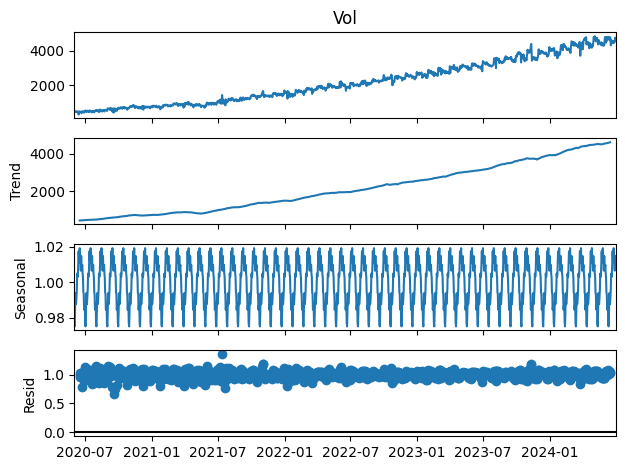

In [ ]:
dec = sm.tsa.seasonal_decompose(df['Vol'],period = 30, model = 'multiplicative').plot()
plt.show()

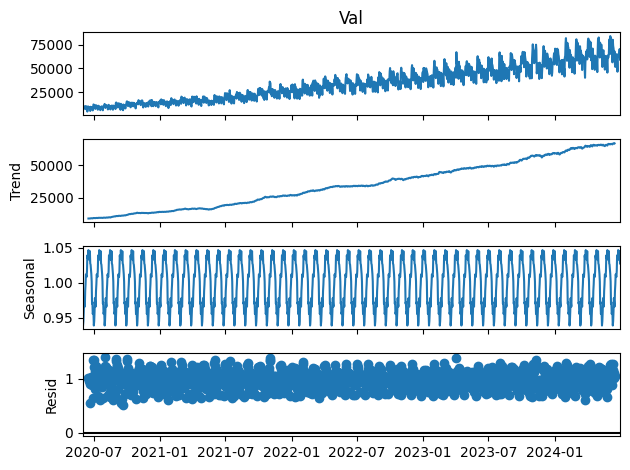

In [ ]:
dec = sm.tsa.seasonal_decompose(df['Val'],period = 30, model = 'multiplicative').plot()
plt.show()

# Defining important functions

**Defining Dickey-Fuller test for Stationarity**

In [ ]:
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller

def adfuller_test(col):
    result=adfuller(col)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

For "Vol" data

In [ ]:
adfuller_test(df['Vol'])

ADF Test Statistic : 1.9914203313883863
p-value : 0.9986616986026696
#Lags Used : 24
Number of Observations Used : 1466
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


For "Val" data

In [ ]:
adfuller_test(df['Val'])

ADF Test Statistic : -0.3564569648359322
p-value : 0.9171190012280932
#Lags Used : 24
Number of Observations Used : 1466
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


From test also it is now evident that data is not stationary. So we need to do differencing.

**Differencing (x_t - x_t-30)**

In [ ]:
df['Vol_1st_diff'] = df['Vol'].diff(periods = 30)

adfuller_test(df['Vol_1st_diff'][30:])

ADF Test Statistic : -5.3345307157577775
p-value : 4.642310952725903e-06
#Lags Used : 23
Number of Observations Used : 1437
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df['Vol_1st_diff'][30:].head()

,Vol_1st_diff
Date,
2020-07-01,38.21
2020-07-02,5.18
2020-07-03,51.15
2020-07-04,35.72
2020-07-05,-32.27


In [ ]:
fig = px.line(df, x=df.index, y="Vol_1st_diff")
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
df['Val_1st_diff'] = df['Val'].diff(periods = 30)

adfuller_test(df['Val_1st_diff'][30:])

ADF Test Statistic : -6.3194666358845435
p-value : 3.09165280616763e-08
#Lags Used : 22
Number of Observations Used : 1438
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df['Val_1st_diff'][30:].head()

,Val_1st_diff
Date,
2020-07-01,1198.60
2020-07-02,543.14
2020-07-03,1113.07
2020-07-04,475.08
2020-07-05,-2424.47


In [ ]:
fig = px.line(df, x=df.index, y="Val_1st_diff")
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Model fitting

**ACF & PACF Plots for "Vol" and "Val" data**

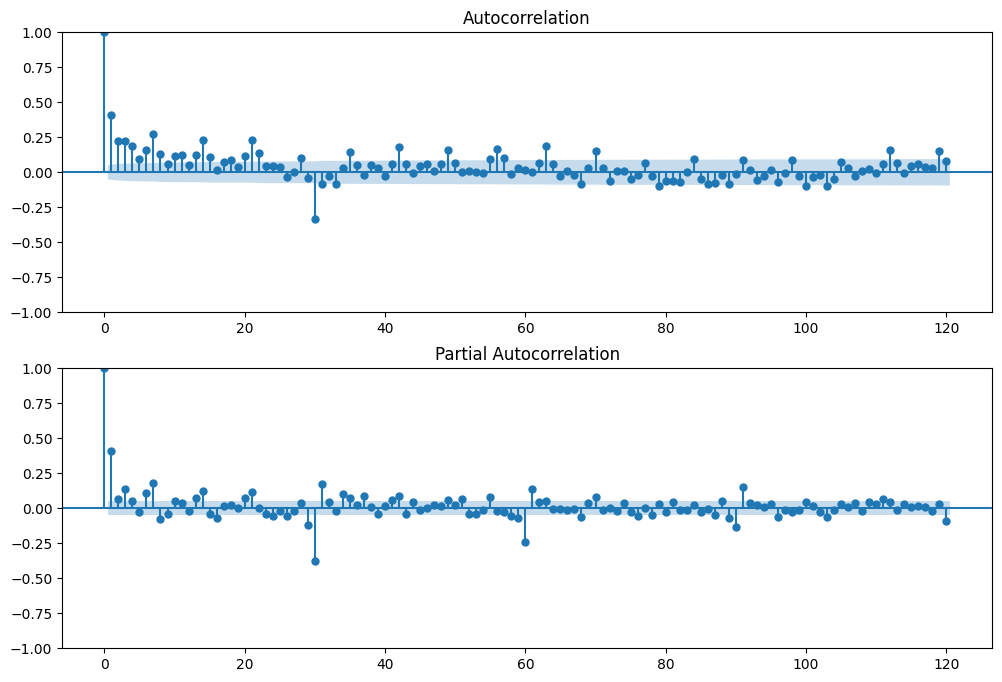

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Vol_1st_diff'].iloc[30:],lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Vol_1st_diff'].iloc[30:],lags=120,ax=ax2)

From the above ACF and PACF plots we can see that there is seasonal component also in the series. Also we see that ACF tends to 0 after 3rd or 4th lag in the beginning. It is showing spikes in the period of 30 in ACF and PACF.

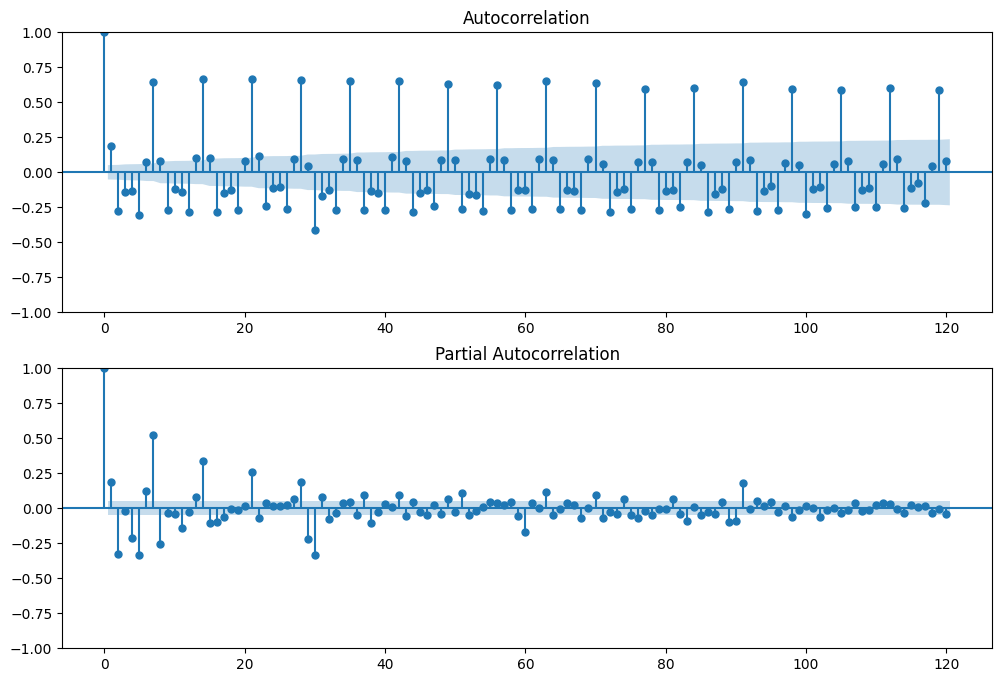

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Val_1st_diff'].iloc[30:],lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Val_1st_diff'].iloc[30:],lags=120,ax=ax2)

**Splitting Dataset**

In [ ]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train_Vol, test_Vol = df['Vol'].iloc[:train_size], df['Vol'].iloc[train_size:]
train_Val, test_Val = df['Val'].iloc[:train_size], df['Val'].iloc[train_size:]

# **ARIMA(p,d,q)**

**For Volume**

In [ ]:
# Fit ARIMA model
# (p, d, q) are the parameters of the ARIMA model. You can adjust these parameters or use auto_arima to determine the best parameters.
model = ARIMA(train_Vol, order=(3, 1, 1))
model_fit = model.fit()

In [ ]:
# Print summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Vol   No. Observations:                 1192
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -6861.000
Date:                Mon, 05 Aug 2024   AIC                          13731.999
Time:                        12:38:56   BIC                          13757.412
Sample:                    06-01-2020   HQIC                         13741.575
                         - 09-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4340      0.032     13.709      0.000       0.372       0.496
ar.L2          0.1709      0.031      5.519      0.000       0.110       0.232
ar.L3          0.0883      0.028      3.098      0.0

In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test_Vol))
predictions = pd.Series(predictions, index=test_Vol.index)

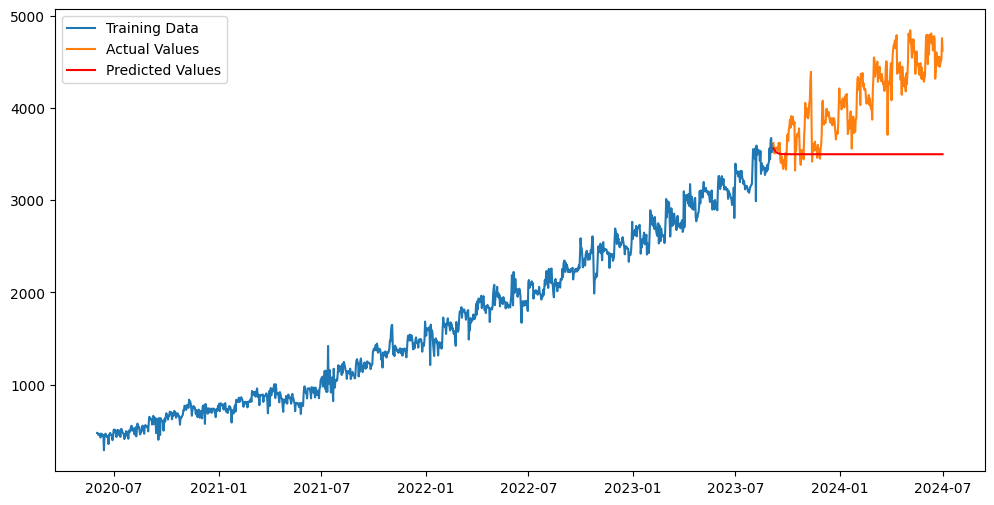

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Vol, label='Training Data')
plt.plot(test_Vol, label='Actual Values')
plt.plot(predictions, label='Predicted Values', color='red')
plt.legend()
plt.show()

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.8 MB/s eta 0:00:00


**For Value**

In [ ]:
# Fit ARIMA model
# (p, d, q) are the parameters of the ARIMA model. You can adjust these parameters or use auto_arima to determine the best parameters.
model = ARIMA(train_Val, order=(2, 1, 1))
model_fit = model.fit()

In [ ]:
# Print summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Val   No. Observations:                 1192
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -11685.321
Date:                Mon, 05 Aug 2024   AIC                          23378.642
Time:                        12:45:03   BIC                          23398.972
Sample:                    06-01-2020   HQIC                         23386.303
                         - 09-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3456      0.022     15.409      0.000       0.302       0.390
ar.L2          0.1331      0.030      4.412      0.000       0.074       0.192
ma.L1         -0.9612      0.011    -90.940      0.0

In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test_Val))
predictions = pd.Series(predictions, index=test_Val.index)

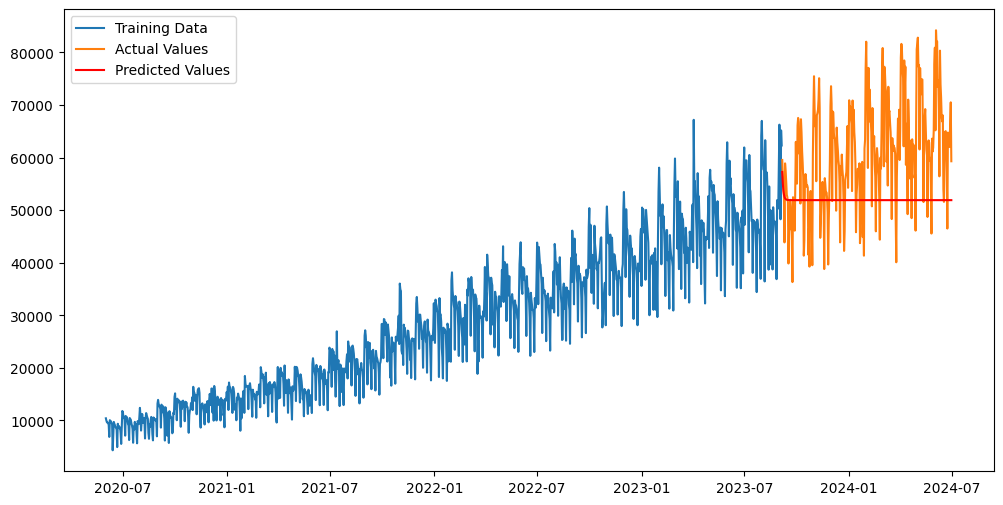

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Val, label='Training Data')
plt.plot(test_Val, label='Actual Values')
plt.plot(predictions, label='Predicted Values', color='red')
plt.legend()
plt.show()

# **SARIMA(p,d,q)*(P,D,Q,S)**

**For Volume**

In [ ]:
# Fit SARIMA model
# (p, d, q) are the parameters for the non-seasonal part of the model.
# (P, D, Q, s) are the parameters for the seasonal part of the model.
# 's' is the periodicity of the seasonality (e.g., 7 for weekly, 12 for monthly).
# You can adjust these parameters or use auto_arima to determine the best parameters.
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train_Vol, order=(2, 0, 3), seasonal_order=(3, 1, 1, 30))
model_fit = model.fit(disp=False)

# Forecast and get predictions for the training data to get residuals
train_predictions = model_fit.fittedvalues
residuals = train_Vol - train_predictions

# Print summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  Vol   No. Observations:                 1192
Model:             SARIMAX(1, 0, 3)x(3, 1, [1], 30)   Log Likelihood               -6688.402
Date:                              Thu, 08 Aug 2024   AIC                          13394.804
Time:                                      09:25:16   BIC                          13440.325
Sample:                                  06-01-2020   HQIC                         13411.979
                                       - 09-05-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.000   2193.364      0.000       0.999       1.001
ma.L1         -0.66

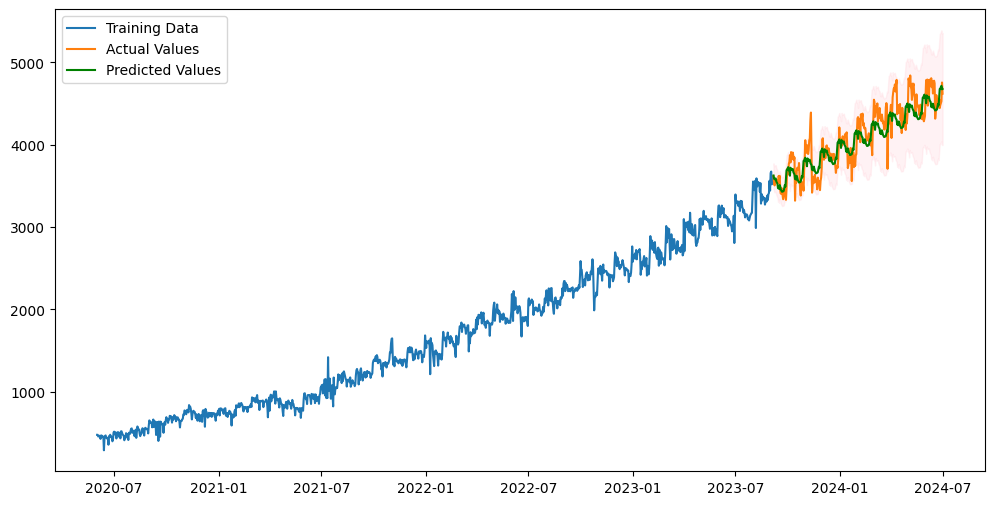

In [ ]:
# Make predictions
predictions = model_fit.get_forecast(steps=len(test_Vol))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Vol, label='Training Data')
plt.plot(test_Vol, label='Actual Values')
plt.plot(predicted_mean, label='Predicted Values', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.show()

**Residual Analysis**

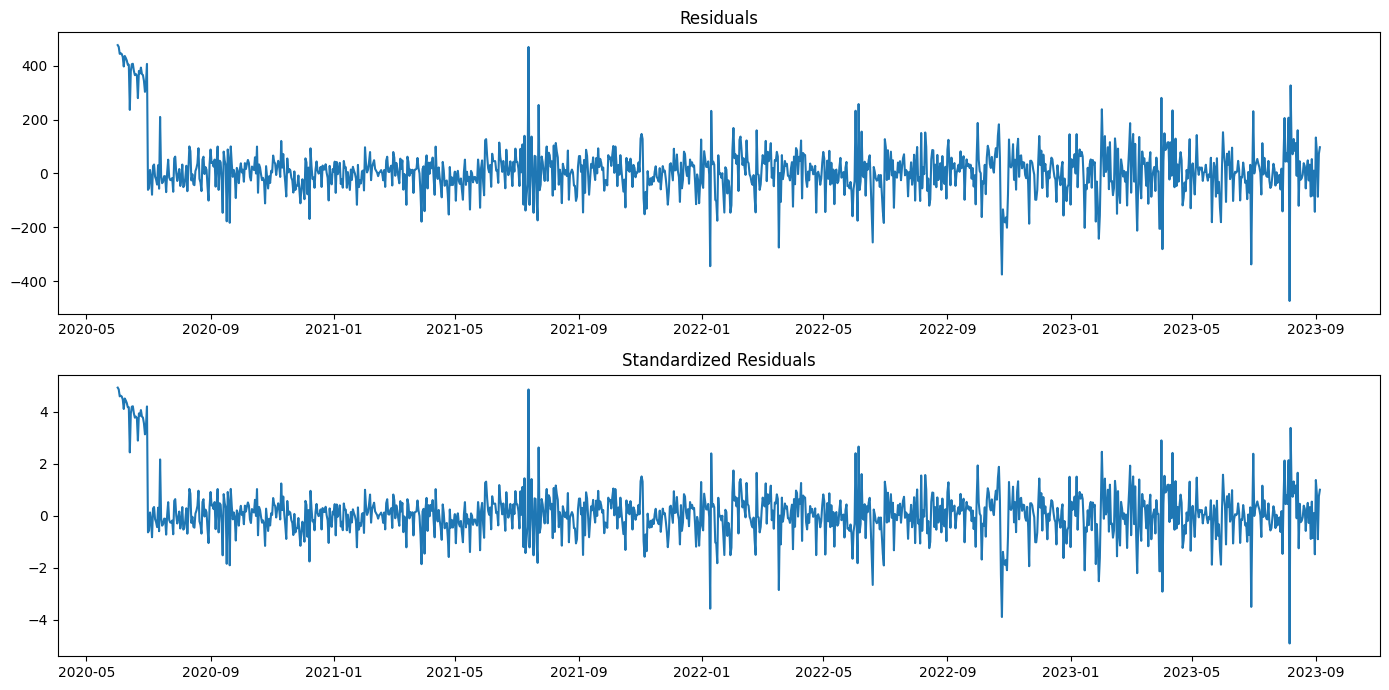

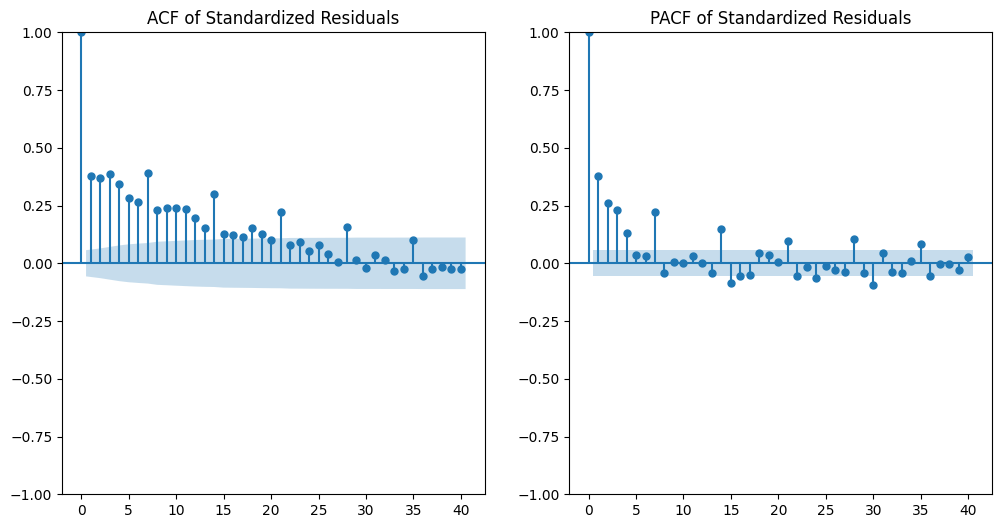

Ljung-Box test result:
        lb_stat      lb_pvalue
10  1220.646097  5.069286e-256
Reject the null hypothesis: Residuals are not independently distributed.


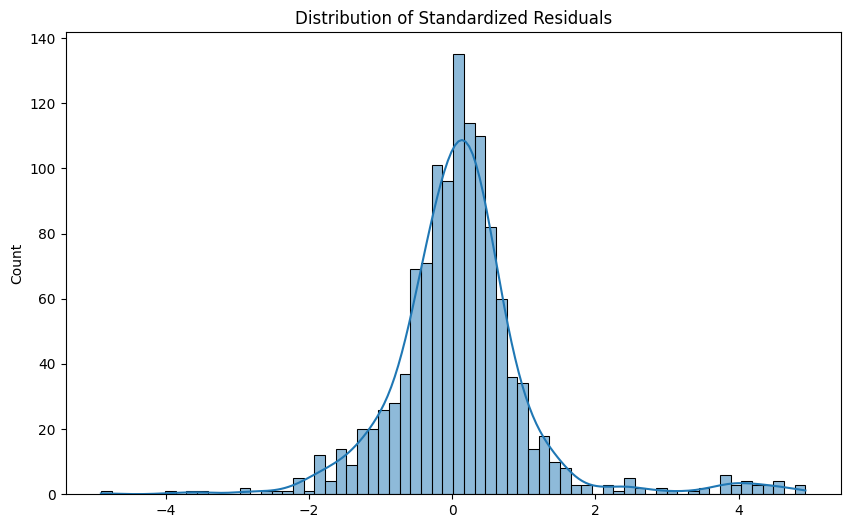

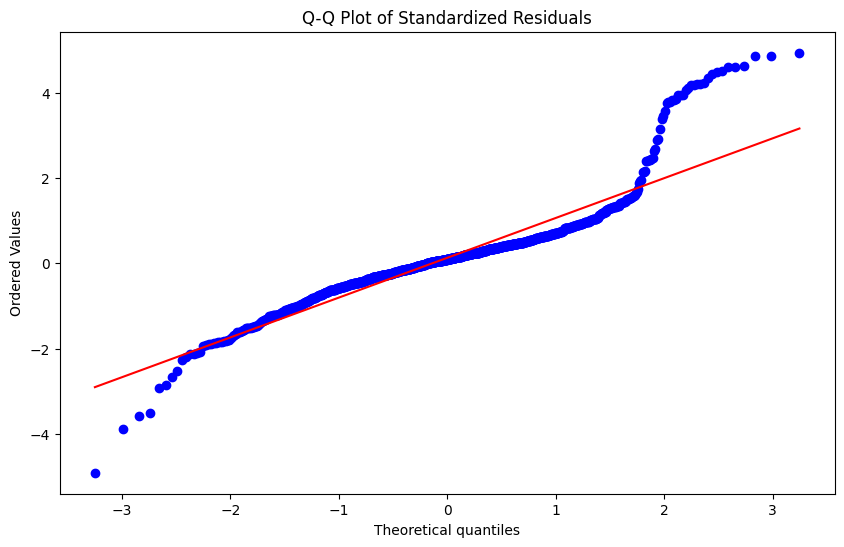

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

# Residuals
residuals = model_fit.resid
standardized_residuals = residuals / np.std(residuals)

# Plot the residuals and standardized residuals
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 1, 2)
plt.plot(standardized_residuals)
plt.title('Standardized Residuals')

plt.tight_layout()
plt.show()

# Plot ACF and PACF of standardized residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Standardized Residuals')
plt.subplot(122)
plot_pacf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Standardized Residuals')
plt.show()

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(standardized_residuals, lags=[10], return_df=True)
print("Ljung-Box test result:")
print(ljung_box_result)

# Interpretation
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Fail to reject the null hypothesis: Residuals are independently distributed.")
else:
    print("Reject the null hypothesis: Residuals are not independently distributed.")

# Plot the distribution of the standardized residuals
plt.figure(figsize=(10, 6))
sns.histplot(standardized_residuals, kde=True)
plt.title('Distribution of Standardized Residuals')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

**For Value**

In [ ]:
model = SARIMAX(train_Val, order=(2, 0, 2), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit(disp=False)

# Forecast and get predictions for the training data to get residuals
train_predictions = model_fit.fittedvalues
residuals = train_Val - train_predictions

# Print summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  Val   No. Observations:                 1192
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 30)   Log Likelihood              -11396.084
Date:                              Wed, 07 Aug 2024   AIC                          22806.168
Time:                                      18:31:01   BIC                          22841.573
Sample:                                  06-01-2020   HQIC                         22819.526
                                       - 09-05-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3212      0.047      6.819      0.000       0.229       0.414
ar.L2          0.67

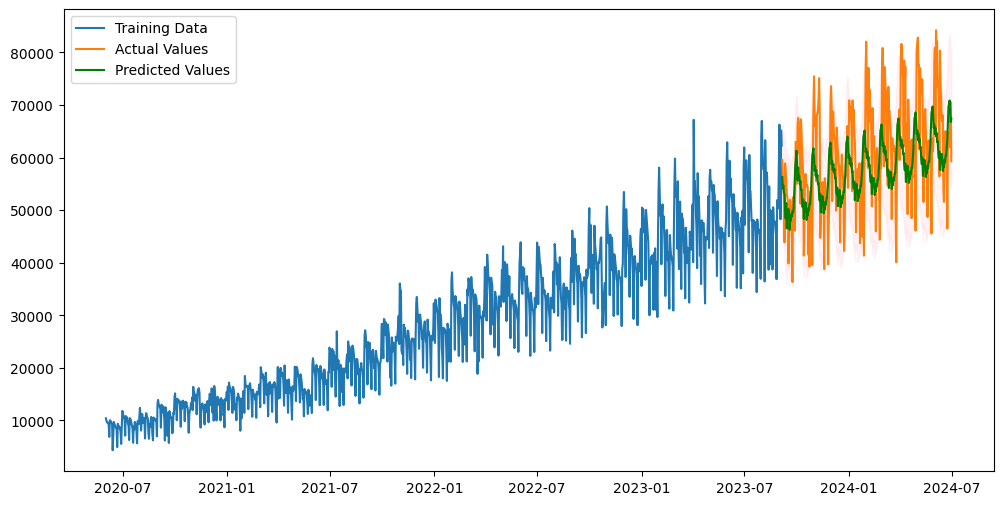

In [ ]:
# Make predictions
predictions = model_fit.get_forecast(steps=len(test_Val))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Val, label='Training Data')
plt.plot(test_Val, label='Actual Values')
plt.plot(predicted_mean, label='Predicted Values', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.show()

**Residual Analysis**

In [ ]:
# Residuals
residuals = model_fit.resid
standardized_residuals = residuals / np.std(residuals)

# Plot the residuals and standardized residuals
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 1, 2)
plt.plot(standardized_residuals)
plt.title('Standardized Residuals')

plt.tight_layout()
plt.show()

# Plot ACF and PACF of standardized residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Standardized Residuals')
plt.subplot(122)
plot_pacf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Standardized Residuals')
plt.show()

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(standardized_residuals, lags=[10], return_df=True)
print("Ljung-Box test result:")
print(ljung_box_result)

# Interpretation
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Fail to reject the null hypothesis: Residuals are independently distributed.")
else:
    print("Reject the null hypothesis: Residuals are not independently distributed.")

# Plot the distribution of the standardized residuals
plt.figure(figsize=(10, 6))
sns.histplot(standardized_residuals, kde=True)
plt.title('Distribution of Standardized Residuals')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()